In [1]:
import random

# Structure de données, affichage

In [55]:
# Représentation d'un pseudo-labyrinthe avec deux matrices de murs horizontaux et verticaux
class pseudoLabyrinthe:
    def __init__(self, n, m): # constructeur de la classe pseudolabyrinthe
        self.n = n
        self.m = m
        # Matrice de murs (True = mur, False = passage)
        self.murs_horizontaux = [[False for i in range(m)] for j in range(n-1)]
        self.murs_verticaux = [[False for i in range(n)] for j in range(m-1)]

    # Génère un pseudo-labyrinthe aléatoire
    def generer_aleatoire(self):
        for i in range(self.n - 1):
            for j in range(self.m):
                self.murs_horizontaux[i][j] = random.choice([True, False])
        for i in range(self.m - 1):
            for j in range(self.n):
                self.murs_verticaux[i][j] = random.choice([True, False])
    def enceinte(self):
        """
        affiche une cellule de taille M*N, avec la grille
        """
        k = line2d([(0,0), (self.m, 0), (self.m, self.n), (0, self.n), (0,0)], color="red", thickness=2, gridlines=True)
        return k
    def afficher(self):
        graphHorizontal = line2d([(0, 0), (0, 0)])
        graphVertical = line2d([(0, 0), (0, 0)])
        for i in range(len(self.murs_horizontaux)):
            for j in range(len(self.murs_horizontaux[i])):
                if (self.murs_horizontaux[i][j]):
                    """ 
                    On offset le j de 1 en bas pour pas qu'on ait des lignes tracées sur l'axe des
                    abscisses. 
                    """
                    graphHorizontal += line2d([(i, j+1), (i+1, j+1)], color="red", thickness=2)
        for i in range(len(self.murs_verticaux)):
            for j in range(len(self.murs_verticaux[i])):
                if (self.murs_verticaux[i][j]):
                    """
                    Idem pour les i ici. La lecture des valeurs de la matrice se fait verticalement, ce qui parait assez
                    contre-intuitif, mais ca marche.
                    """
                    graphVertical += line2d([(i+1, j), (i+1, j+1)], color="red", thickness=2)
        return graphHorizontal + graphVertical + self.enceinte()

# test d'affichage et de création d'un labyrinthe

In [56]:
print(labyrinthe.murs_horizontaux)

[[True, False], [False, False], [True, True], [True, False], [False, False]]


In [62]:
print(labyrinthe.murs_verticaux)

[[False, True, True, True, True, True]]


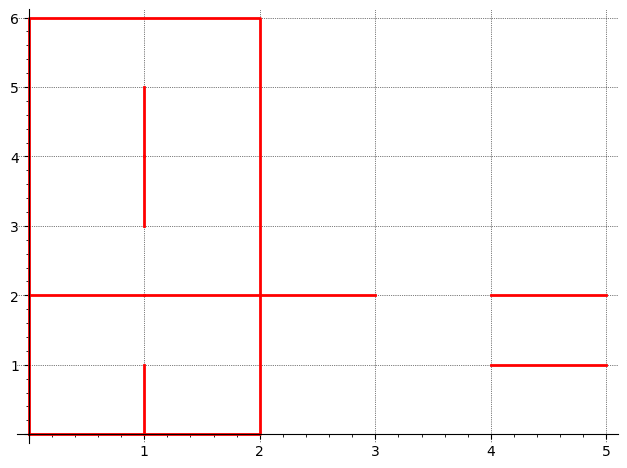

In [65]:
# Bug à régler, le programme fait des conneries lorsque l'on met un petit n
labyrinthe = pseudoLabyrinthe(6, 2)
labyrinthe.generer_aleatoire()
labyrinthe.afficher()